#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GaussianNoise

#### Loading the data

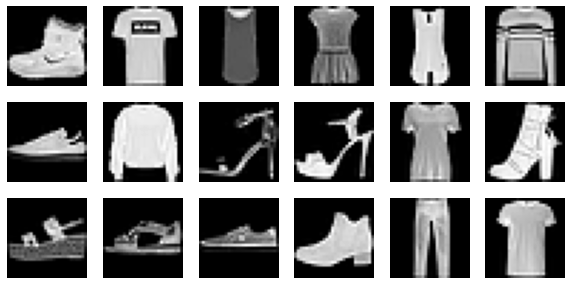

In [31]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.figure(figsize=(10, 5))

for i in range(18):
    plt.subplot(3, 6, i+1)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='gray')
plt.show()

In [32]:
# Scaling the image to make the training faster

X_train = X_train/ 255.0
X_test = X_test/ 255.0

#### Adding Noise to the images

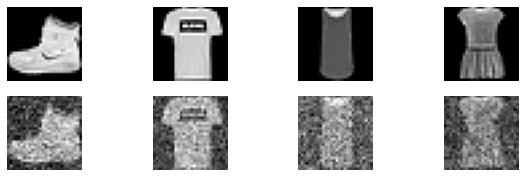

In [33]:
noise = GaussianNoise(0.2)
noisy_image = noise(X_train[:4], training= True)

plt.figure(figsize=(10, 3))
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, i+1+4)
    plt.axis('off')
    plt.imshow(noisy_image[i], cmap='gray')
plt.show()

#### Auto-Encoder

In [5]:
units = 28 * 28

##### Encoder Layers

In [6]:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28, 28]))
encoder.add(GaussianNoise(0.2)) # Adding Gaussian Noise
encoder.add(Dense(units = units//2, activation = 'relu'))
encoder.add(Dense(units = units//4, activation = 'relu'))
encoder.add(Dense(units = units//8, activation = 'relu'))
encoder.add(Dense(units = units//16, activation = 'relu'))
encoder.add(Dense(units = units//32, activation = 'relu'))
encoder.add(Dense(units = units//64, activation = 'relu'))

#### Decoder Layers

In [7]:
decoder = Sequential()
decoder.add(Dense(units = units//32, input_shape=[units//64], activation = 'relu'))
decoder.add(Dense(units = units//16, activation = 'relu'))
decoder.add(Dense(units = units//8, activation = 'relu'))
decoder.add(Dense(units = units//4, activation = 'relu'))
decoder.add(Dense(units = units//2, activation = 'relu'))
decoder.add(Dense(units = units, activation = 'relu'))
decoder.add(Reshape([28, 28]))

### Combining Encoder and Decoder and Training

In [8]:
denoiser = Sequential([encoder, decoder])
denoiser.compile(loss = 'binary_crossentropy',
                 optimizer='adam',
                 metrics = ['accuracy'])

In [34]:
denoiser.fit(X_train, X_train, epochs=10, verbose=0)

#### Adding noise to test data

In [35]:
noisy_test_images = noise(X_test[:10], training = True)

In [36]:
clean_test_image = denoiser(noisy_test_images)

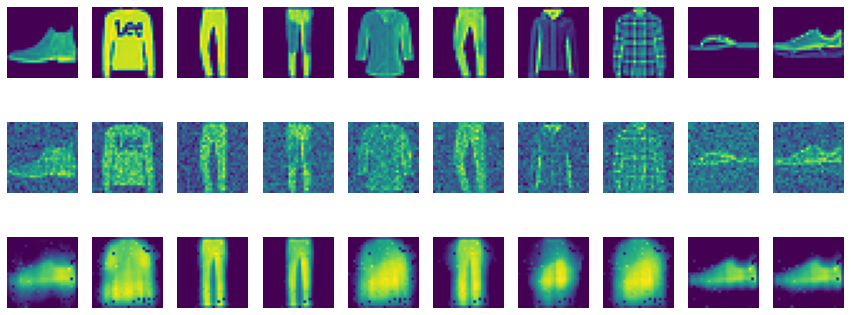

In [37]:
plt.figure(figsize = (15, 6))
for i in range(10):
    plt.subplot(3, 10, i+1)
    plt.axis('off')
    plt.imshow(X_test[i])

    plt.subplot(3, 10, i+1+10)
    plt.axis('off')
    plt.imshow(noisy_test_images[i])

    plt.subplot(3, 10, i+1+20)
    plt.axis('off')
    plt.imshow(clean_test_image[i])